# Beginner Python and Math for Data Science
## Lecture 6 
### Linear Algebra - Vector Multiplication (Cross Product)

__Purpose:__ We will learn vector multiplication cross product.

__At the end of this lecture you will be able to:__
> 1. Understand the use of vector cross product
> 2. Understand how to use vector cross product to extract angles between vectors

### 1.1.1 Operations with Vectors (Vector Multiplication - Cross Product):

__Overview:__
- __[Cross Product](https://en.wikipedia.org/wiki/Cross_product):__ The Cross Product is the second of two ways to multiply vectors and it takes two vectors in two-dimensional space and returns a vector that is perpendicular to the two original vectors 
- The Cross Product can be represented both algebraically and geomtrically:
> 1. __Algebraically:__ Algebraically, the cross product is expressed as a seemingly arbitrary combination of the component elements: 
<center> If $\pmb a = [a_1, a_2, a_3]$ and $\pmb b = [b_1, b_2, b_3]$, then $\pmb a \times \pmb b = [a_2b_3 - a_3b_2, a_3b_1 - a_1b_3, a_1b_2 - a_2b_1]$ </center>
> 2. __Geometrically:__ Geometrically, the cross product is expressed as the product of the two vectors length (recall the definition of length above) and the sin of the angle between the two vectors:
<center> $\| \pmb a \times \pmb b \| = \| \pmb a \| \| \pmb b \| sin(\theta)$, where $\theta$ is the angle between the vectors </center>
- The Cross Product obeys the following laws:
> 1. $\pmb a \times \pmb b = -\pmb b \times \pmb a$
> 2. $(c\pmb a) \times \pmb b = \pmb a \times (c \pmb b) = c(\pmb a \times \pmb b)$
> 3. $\pmb a \times (\pmb b + \pmb c) = \pmb a \times \pmb b + \pmb a \times \pmb c$
> 4. $\pmb a \cdot (\pmb b \times \pmb c) = (\pmb a \times \pmb b) \cdot \pmb c$
> 5. $\pmb a \times (\pmb b \times \pmb c) = (\pmb c \cdot \pmb a)\pmb b - (\pmb b \cdot \pmb a)\pmb c$

__Helpful Points:__
1. The Cross Product can only operate in $\mathbb R^3$, where the Dot Product can operate in any $n$-dimensional space 
2. The Cross Product returns a vector, whereas the Dot Product returns a number 

__Practice:__ Examples of Cross Product in Python 

In [1]:
import numpy as np 
from scipy import linalg 
import math 
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Example 1 (Cross Product - Manually):

In [2]:
a = np.array([4,3,1])
b = np.array([1,2,1])

### Example 1.1 (Algebraically):

In [3]:
# cross product of a and b 
a_cross_b_1 = a[1]*b[2] - a[2]*b[1]
a_cross_b_2 = a[2]*b[0] - a[0]*b[2]
a_cross_b_3 = a[0]*b[1] - a[1]*b[0]
print("a cross b is ({}, {}, {})".format(a_cross_b_1, a_cross_b_2, a_cross_b_3))

a cross b is (1, -3, 5)


In [4]:
# check that a cross b is orthogonal to a and b
a_cross_b = np.array([1, -3, 5])
print("a cross b dot a is {}".format(np.dot(a_cross_b, a)))
print("a cross b dot b is {}".format(np.dot(a_cross_b, b)))

a cross b dot a is 0
a cross b dot b is 0


### Example 1.2 (Geometrically):

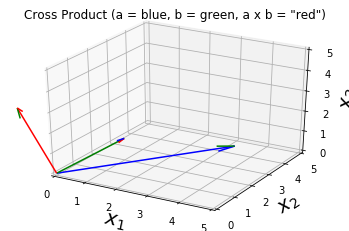

In [5]:
fig = plt.figure()
ax = fig.gca(projection="3d")
soa = np.array([[0, 0, 0, 4, 3, 1], [0, 0, 0, 1, 2, 1], [0, 0, 0, 1, -3, 5]])
X, Y, Z, U, V, W = zip(*soa)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 5)
ax.quiver(X, Y, Z, U, V, W, length=1, arrow_length_ratio = 0.1, colors = ["blue", "green", "red"])
plt.title('Cross Product (a = blue, b = green, a x b = "red")')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

In [6]:
# angle between vectors a and b 
length_a = math.sqrt(a[0]**2 + a[1]**2 + a[2]**2)
length_b = math.sqrt(b[0]**2 + b[1]**2 + b[2]**2)
length_a_cross_b = math.sqrt(a_cross_b[0]**2 + a_cross_b[1]**2 + a_cross_b[2]**2)
math.degrees(math.asin(length_a_cross_b / (length_a * length_b))) # inverse sin and convert from radians to degrees

28.27249421331206

### Example 2 (Cross Product - Programmatically):

In [7]:
a = np.array([4,3,1])
b = np.array([1,2,1])

In [8]:
# cross product of vectors a and b 
np.cross(a, b)

array([ 1, -3,  5])

In [9]:
# angle between vectors a and b 
math.degrees(math.asin(math.sqrt(np.dot(np.cross(a,b), np.cross(a,b))) / (math.sqrt(np.dot(a,a)) * math.sqrt(np.dot(b,b)))))

28.27249421331206

### 1.1.2 Angles Between Vectors - Part 2:

__Overview:__ 
- Using the formula of cross product expressed in terms of the angle between the two vectors $\| \pmb a \times \pmb b \| = \| \pmb a \| \| \pmb b \|sin(\theta)$, we can glean some important properties of vectors 
> 1. __Property 1:__ If $\pmb a$ and $\pmb b$ are two vectors where $\pmb b = c \pmb a$ and $c \geq 0, c \in \mathbb R$, then we have two vectors that are scalar multiples of each other where the scalar is greater than zero and the angle between the vectors is $0^\circ$ degrees. Since the sin of 0 is equal to 0, then $\pmb a \times \pmb b$ is equal to 0
> 2. __Property 2:__ If $\pmb a$ and $\pmb b$ are two vectors where $\pmb b = c \pmb a$ and $c \leq 0, c \in \mathbb R$, then we have two vectors that are scalar multiples of each other where the scalar is less than zero and the angle between the vectors is $180^\circ$ degrees. Since the sine of 180 is equal to 0, then $\pmb a \times \pmb b$ is equal to 0
> 3. __Property 3:__ If $\pmb a$ and $\pmb b$ are two non-zero vectors and $\pmb a \perp \pmb b$, then we have two vectors that are perpendicular to each other and the angle between the vectors is $90^\circ$ degrees. Since the sin of 90 is equal to 1, then $\pmb a \times \pmb b$ is equal to $\| \pmb a \| \| \pmb b \|$

__Helpful Notes:__ 
1. We can explore the angle properties below in a similar fashion as we did with dot product 

__Practice:__ Examples of working with angles between vectors in Python 

### Example 1 (Sine Cuve):

To understand the possible scenarios that arise as a result of the sine of different angles, we should make sure we are comfortable with what the sine curve looks like.

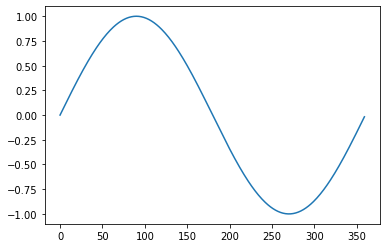

In [10]:
x = np.arange(360)
y = np.sin(np.deg2rad(x))
plt.plot(x, y)
plt.show()

### Example 2 (Property 1 - CrossProduct of Scalar Multiples with c > 0):

In [11]:
a = np.array([1,1,1])
b = np.array([2,2,2]) # c = 2 and b = ca

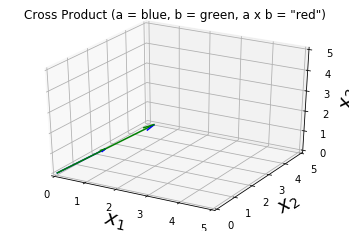

In [12]:
fig = plt.figure()
ax = fig.gca(projection="3d")
soa = np.array([[0, 0, 0, 1, 1, 1], [0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 0, 0]])
X, Y, Z, U, V, W = zip(*soa)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 5)
ax.quiver(X, Y, Z, U, V, W, length=1, arrow_length_ratio = 0.1, colors = ["blue", "green"])
plt.title('Cross Product (a = blue, b = green, a x b = "red")')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

In [13]:
# compare lhs to rhs 
a_cross_b = np.cross(a, b)
a_length = math.sqrt(np.dot(a,a))
b_length = math.sqrt(np.dot(b,b))
sin_theta = np.sin(np.deg2rad(0))
print("a cross b is {} and the product of a and b length and sin(theta) is {}".format(math.sqrt(np.dot(a_cross_b, a_cross_b)), round(a_length*b_length*sin_theta,1)))

a cross b is 0.0 and the product of a and b length and sin(theta) is 0.0


### Example 2 (Property 2 - Cross Product of Scalar Multiples with c < 0):

In [14]:
a = np.array([1,1,1])
b = np.array([-2,-2,-2]) # c = -2 and b = ca

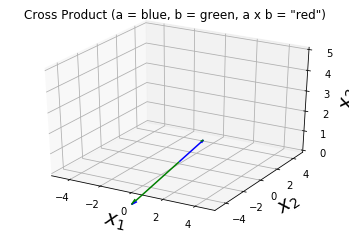

In [15]:
fig = plt.figure()
ax = fig.gca(projection="3d")
soa = np.array([[0, 0, 0, 1, 1, 1], [0, 0, 0, -2, -2, -2], [0, 0, 0, 0, 0, 0]])
X, Y, Z, U, V, W = zip(*soa)
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(0, 5)
ax.quiver(X, Y, Z, U, V, W, length=1, arrow_length_ratio = 0.1, colors = ["blue", "green"])
plt.title('Cross Product (a = blue, b = green, a x b = "red")')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

In [16]:
# compare lhs to rhs 
a_cross_b = np.cross(a, b)
a_length = math.sqrt(np.dot(a,a))
b_length = math.sqrt(np.dot(b,b))
sin_theta = np.sin(np.deg2rad(180))
print("a cross b is {} and the product of a and b length and sin(theta) is {}".format(math.sqrt(np.dot(a_cross_b, a_cross_b)), round(a_length*b_length*sin_theta,1)))

a cross b is 0.0 and the product of a and b length and sin(theta) is 0.0


### Example 3 (Property 3 - Cross Product of Perpendicular Vectors):

In [17]:
a = np.array([3,0,0])
b = np.array([0,3,0])

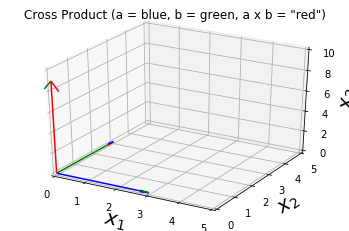

In [18]:
fig = plt.figure()
ax = fig.gca(projection="3d")
soa = np.array([[0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 9]])
X, Y, Z, U, V, W = zip(*soa)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 10)
ax.quiver(X, Y, Z, U, V, W, length=1, arrow_length_ratio = 0.1, colors = ["blue", "green", "red"])
plt.title('Cross Product (a = blue, b = green, a x b = "red")')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

In [19]:
# compare lhs to rhs 
a_cross_b = np.cross(a, b)
a_length = math.sqrt(np.dot(a,a))
b_length = math.sqrt(np.dot(b,b))
sin_theta = np.sin(np.deg2rad(90))
print("a cross b is {} and the product of a and b length and sin(theta) is {}".format(math.sqrt(np.dot(a_cross_b, a_cross_b)), round(a_length*b_length*sin_theta,1)))

a cross b is 9.0 and the product of a and b length and sin(theta) is 9.0


### Problem 1:

Compute the cross product of the following set of vectors: 

Set 1: 
$\pmb a = [1,3,1]$
$\pmb b = [2,6,2]$

Set 2:
$\pmb c = [2,1,1]$
$\pmb d = [-8,-4,-4]$

Set 3:
$\pmb e = [4,0,0]$
$\pmb f = [0,6,0]$

Comment on the angle between each set of vectors. 

In [20]:
# write your code here 





### SOLUTIONS

### Problem 1:

Compute the cross product of the following set of vectors: 

Set 1: 
$\pmb a = [1,3,1]$
$\pmb b = [2,6,2]$

Set 2:
$\pmb c = [2,1,1]$
$\pmb d = [-8,-4,-4]$

Set 3:
$\pmb e = [4,0,0]$
$\pmb f = [0,6,0]$

Comment on the angle between each set of vectors. 

In [21]:
a = np.array([1,3,1])
b = np.array([2,6,2])
c = np.array([2,1,1])
d = np.array([-8,-4,-4])
e = np.array([4,0,0])
f = np.array([0,6,0])

In [22]:
np.cross(a,b)

array([0, 0, 0])

The vectors are scalar multiples so the angle btween them is 0 degrees. $Sin(0) = 0$

In [23]:
np.cross(c,d)

array([0, 0, 0])

The vectors lie tip to top so the angle btween them is 180 degrees. $Sin(180) = 0$

In [24]:
np.cross(e,f)

array([ 0,  0, 24])

The vectors are perpendicular and therefore the angle between them is 90 degrees. $Sin(90) = 1$